# This project is to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

Data Set

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

# Import module

In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

# Import Data

In [84]:
college = pd.read_csv("K_Means_Clustering - College_Data", index_col=0)

In [85]:
np.sum(college.isna())

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [86]:
college.shape

(777, 18)

In [87]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [88]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


# Data Visualization

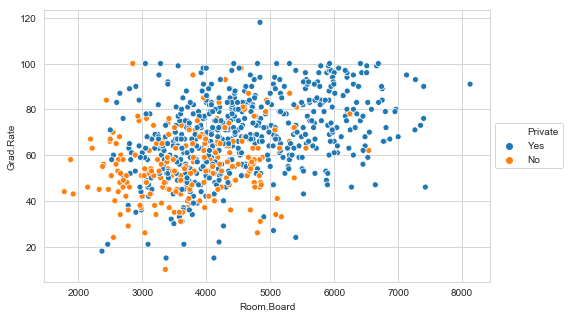

In [89]:
plt.figure(figsize=(8,5))
sns.set_style(style='whitegrid')
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=college, hue='Private')
plt.legend(loc='center left', bbox_to_anchor=[1.0, 0.5])

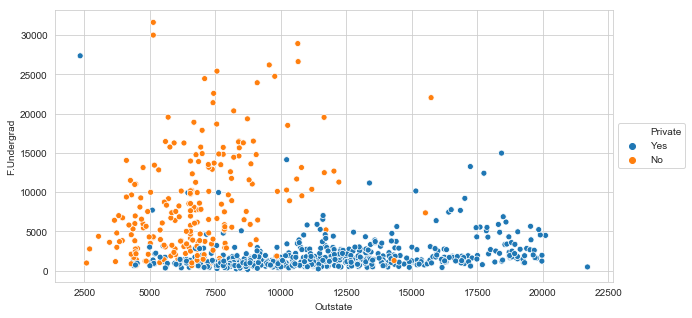

In [90]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Outstate', y='F.Undergrad', hue='Private', data=college)
plt.legend(loc='center left', bbox_to_anchor=[1.0, 0.5])

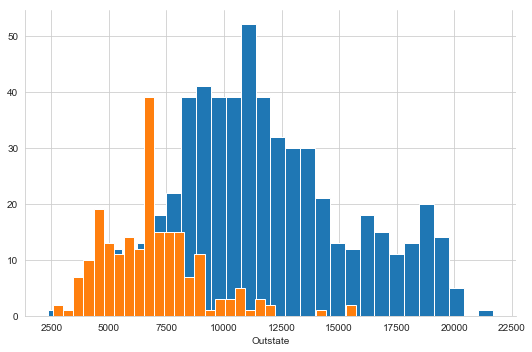

In [91]:
g = sns.FacetGrid(college, hue='Private', height=5, aspect=1.5)
g.map(plt.hist, 'Outstate', bins=30)

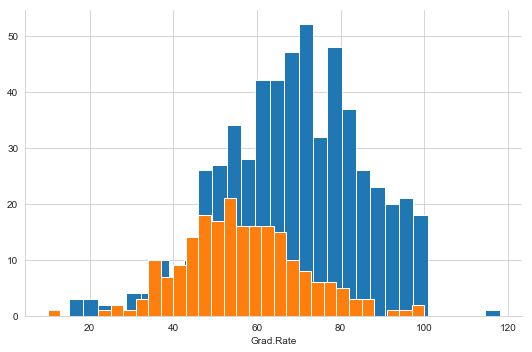

In [92]:
g = sns.FacetGrid(college, hue='Private', height=5, aspect=1.5)
g.map(plt.hist, 'Grad.Rate', bins=30)

In [173]:
#There is a school with graduation rate higher than 100%
college[college['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [174]:
college.iloc[95, -1] = 100

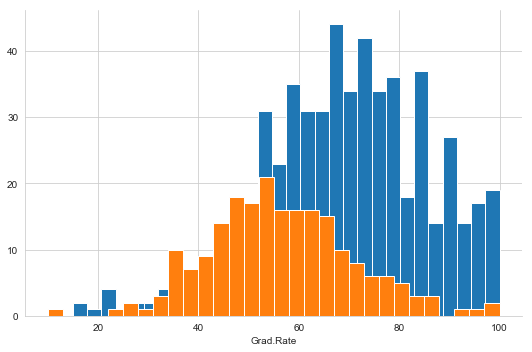

In [175]:
g = sns.FacetGrid(college, hue='Private', height=5, aspect=1.5)
g.map(plt.hist, 'Grad.Rate', bins=30)

# KMeans Cluster Model

In [183]:
# drop the label for unsupervise learning
X = college.drop('Private', axis=1)

In [184]:
kmean = KMeans(n_clusters=2)

In [185]:
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [186]:
y_pred = kmean.labels_

In [187]:
def conv(y):
    if y == 'Yes':
        return 1
    else:
        return 0
        
college['y_true'] = college['Private'].apply(conv)

In [190]:
confusion_matrix(college['y_true'], y_pred)

array([[ 74, 138],
       [ 34, 531]], dtype=int64)

In [192]:
print(classification_report(college['y_true'], y_pred))

             precision    recall  f1-score   support

          0       0.69      0.35      0.46       212
          1       0.79      0.94      0.86       565

avg / total       0.76      0.78      0.75       777

